In [2]:
import glob
import os
import json
import pandas as pd
from datetime import datetime
from tqdm import tqdm

arquivos_dia_util = glob.glob("/media/default/Extreme SSD/Datamining/T3/Parquets/*2024-05-07*.parquet")

dfs = []
for arquivo in arquivos_dia_util:
    df = pd.read_parquet(arquivo)
    dfs.append(df)

df_dia_util = pd.concat(dfs, ignore_index=True)

print(f"Total de linhas carregadas para o dia útil: {len(df_dia_util)}")

Total de linhas carregadas para o dia útil: 10070708


In [3]:
linhas_desejadas = [
    '483', '864', '639', '3', '309', '774', '629', '371', '397', '100', '838', '315', '624',
    '388', '918', '665', '328', '497', '878', '355', '138', '606', '457', '550', '803', '917',
    '638', '2336', '399', '298', '867', '553', '565', '422', '756', '292', '554', '634', '232',
    '415', '2803', '324', '852', '557', '759', '343', '779', '905', '108'
]


In [4]:
# Filtrar apenas as linhas desejadas
df_filtrado = df_dia_util[df_dia_util['linha'].astype(str).isin(linhas_desejadas)]

print(f"Total de linhas APÓS filtro das linhas desejadas: {len(df_filtrado)}")


Total de linhas APÓS filtro das linhas desejadas: 3155777


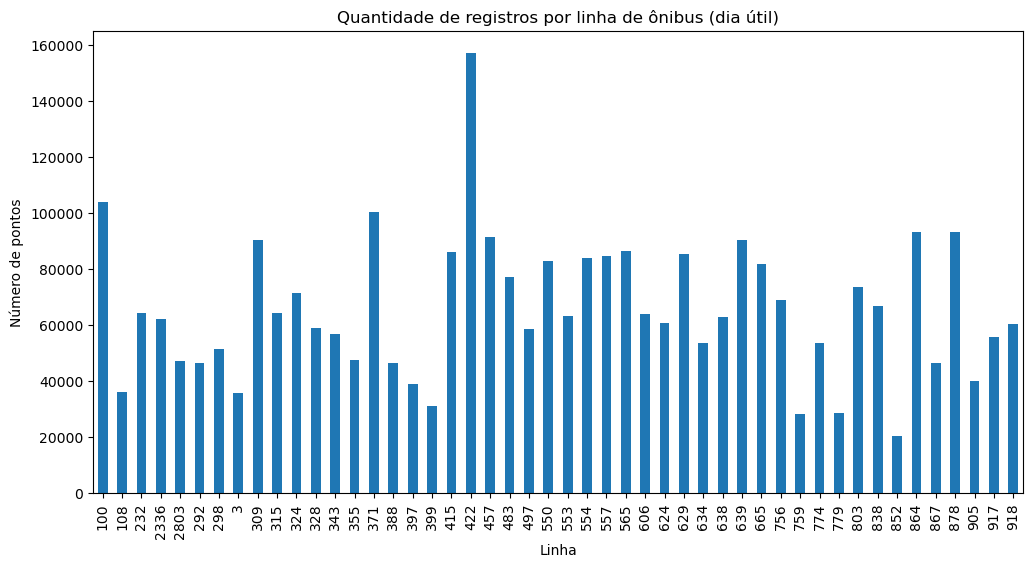

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
linha_counts.plot(kind='bar')
plt.title("Quantidade de registros por linha de ônibus (dia útil)")
plt.xlabel("Linha")
plt.ylabel("Número de pontos")
plt.show()


/tmp/ipykernel_94744/3251910611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['hora'] = df_filtrado['datahora'].dt.hour


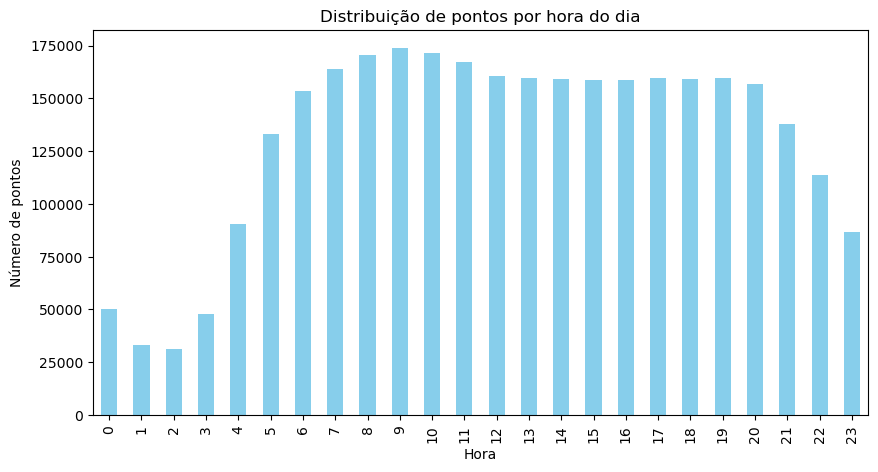

In [7]:
df_filtrado['hora'] = df_filtrado['datahora'].dt.hour

hora_counts = df_filtrado['hora'].value_counts().sort_index()

plt.figure(figsize=(10,5))
hora_counts.plot(kind='bar', color='skyblue')
plt.title("Distribuição de pontos por hora do dia")
plt.xlabel("Hora")
plt.ylabel("Número de pontos")
plt.show()


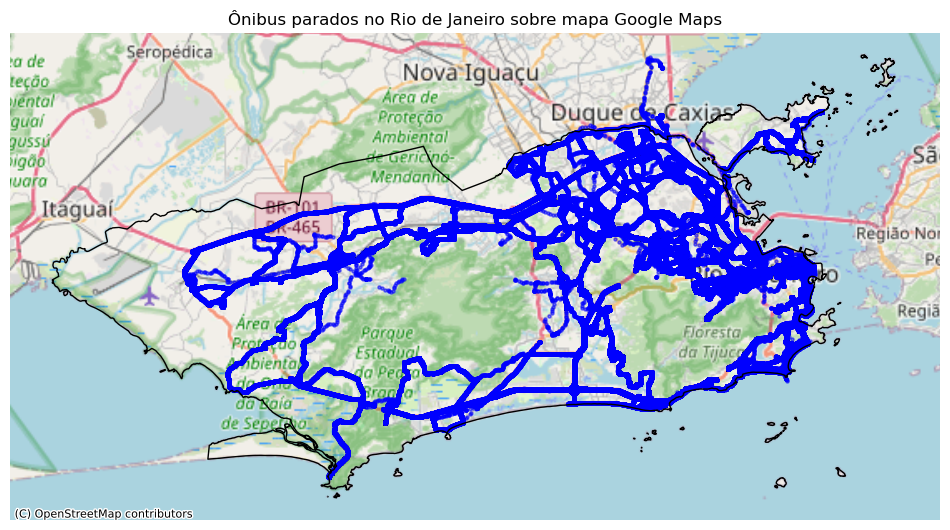

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Supondo que você já tem seu df_filtrado (com colunas 'lon', 'lat') — transforme em GeoDataFrame:
gdf = gpd.GeoDataFrame(
    df_filtrado,
    geometry=gpd.points_from_xy(df_filtrado['longitude'], df_filtrado['latitude']),
    crs="EPSG:4326"  # coordenadas geográficas lat/lon
)

# Reprojete para Web Mercator para usar o contextily (EPSG:3857)
gdf = gdf.to_crs(epsg=3857)

# Ler shapefile do Rio e projetar também para EPSG:3857
shapefile_path = './data/RJ_Municipios_2024.shp'
rj_municipios = gpd.read_file(shapefile_path)
rio = rj_municipios[rj_municipios['NM_MUN'] == 'Rio de Janeiro'].to_crs(epsg=3857)

# Plotar tudo
fig, ax = plt.subplots(figsize=(12,12))

# Limite do município (Rio de Janeiro)
rio.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

# Pontos de ônibus parados
gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)

# Adicionar mapa base Google Maps via contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Remover eixos
ax.set_axis_off()

plt.title("Ônibus no Rio de Janeiro sobre mapa")
plt.show()

